# (Notebook still in progress) 

## Indice

In [1]:
# TODO

## Heart Failure
#### Brief description

In [2]:
# TODO

## Data Dictionary

|Column|Description|
|------|-----------|
|*Age*|Age of the patient|
|*Age Group*|Such as 21-30 and 31-40 are grouped|
|*Gender*|Sex of the patient|
|*Locality*|Rural or Urban|
|*Marital status*|Married or unmarried|
|*Smoking*|yes/no|
|*Depression*|yes/no|
|*Mortality*|Died= 0 and Alive= 1|
|*Follow.Up*|Number of visiting time|
|*cp*|Chest Pain type chest pain type|
|*Diabetes*|Yes = 0 and No = 1|
|*chol*|cholestoral in mg/dl fetched via BMI sensor|
|*fbs*|(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)|
|*trestbps*|resting blood pressure (in mm Hg)|
|*rest_ecg*|resting electrocardiographic results|
|--------|Value 0: normal|
|--------|Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)|
|--------|Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria|
|*thalach*|maximum heart rate achieved|


In [3]:
# TODO

## Dataset overview

In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from platform import python_version
%matplotlib inline

print("--Packages Loaded!--")
print("Python version: {}".format(python_version()))
print("Pandas version: {}".format(pd.__version__))
print("Numpy version: {}".format(np.__version__))
print("Matplotlib version: {}".format(matplotlib.__version__))
print("Seaborn version: {}".format(sns.__version__))


--Packages Loaded!--
Python version: 3.9.7
Pandas version: 1.4.3
Numpy version: 1.21.5
Matplotlib version: 3.5.1
Seaborn version: 0.11.2


Aiming to pratice my Machine Learning and Data Analytics skills, I'm going to use just 11 variables from the dataset.
<br>
**I will be looking to improve this prediction algorithm in the future**

In [5]:
# Reading the dataset and seeing the first 10 rows

df = pd.read_csv("FIC.Full.csv",
                 usecols=["Age","Gender","Hemoglobin","Depression","Smoking","Diabetes","Family.History","C.P.K","Mortality","trestbps","chol","thalach"], 
                 sep=",", low_memory=False)

# Print the first 5 rows from the dataset
df.head(5)

,Age,Gender,Depression,Smoking,Family.History,Diabetes,C.P.K,Hemoglobin,trestbps,chol,thalach,Mortality
0,45,Female,YES,NO,NO,1,130,11.6,132,341,136,0
1,51,Female,YES,NO,NO,0,163,14.5,130,305,142,0
2,55,Female,YES,NO,NO,1,149,14.1,180,327,117,0
3,55,Female,YES,NO,NO,1,149,14.1,128,205,130,0
4,56,Female,YES,NO,NO,1,75,12.3,200,288,133,0


In [6]:
print("This dataset has {} rows and {} cloumns".format(df.shape[0], df.shape[1]))

This dataset has 368 rows and 12 cloumns


In [7]:
# Checking the columns

list(df.columns)

['Age',
 'Gender',
 'Depression',
 'Smoking',
 'Family.History',
 'Diabetes',
 'C.P.K',
 'Hemoglobin',
 'trestbps',
 'chol',
 'thalach',
 'Mortality']

In [8]:
# Changing columns names

df.rename(columns={"C.P.K":"CPK","trestbps":"BloodPressRest","chol":"cholestoral","thalach":"MaxHeartRate"}, inplace=True)

In [9]:
# Checking for NULL values

df.isna().sum()

Age               0
Gender            0
Depression        0
Smoking           0
Family.History    0
Diabetes          0
CPK               0
Hemoglobin        0
BloodPressRest    0
cholestoral       0
MaxHeartRate      0
Mortality         0
dtype: int64

It seems there aren't NULL values

In [10]:
# Checking for data types in the dataset

df.dtypes

Age                 int64
Gender             object
Depression         object
Smoking            object
Family.History     object
Diabetes            int64
CPK                 int64
Hemoglobin        float64
BloodPressRest      int64
cholestoral         int64
MaxHeartRate        int64
Mortality           int64
dtype: object

In [11]:
#TODO 
## Replace the Smoking and the Depression with a dummy variable

Our target variable will be the **Mortality**, wich represents if the pacient is alive (1) or has died (0).

## Exploratory Analysis

Looking to better understand how are the releationships (if it exists) between the others variables and the target, we will be checking the correlation (Pearson Correlation) of them.

In [12]:
#TODO 
#Create a df with numeric values (dummy variables)
# Create a df with categorical values from the numeric columns

We will reverse the Mortality and Dibetes values, in order to establish as default that in the <b>presence</b> of the respective condition the <b>value 1</b> is going to be assigned, and in the <b>absence</b> of the same the <b>value 0</b> is going to be assigned.

In [13]:
# Reversing the values from "Diabetes" and "Mortality"
df["Diabetes"].replace({1:0, 0:1}, inplace=True)
df["Mortality"].replace({1:0, 0:1}, inplace=True)

In [14]:
# Creating a copy dataframe replacing categorical variables for numerical ones
df_numeric = df.copy()

# Setting all the "NO" values to 0, and all the "YES" values to 1
df_numeric = df_numeric.replace({"YES":1, "NO":0})

In [15]:
# Creating a copy dataframe replacing numeric variables for categorical ones
df_categorical = df.copy()

# Setting all 1 values to "YES", and all the 0 values to "NO"
df_categorical["Mortality"].replace({1:"YES", 0:"NO"}, inplace=True)
df_categorical["Diabetes"].replace({1:"YES", 0:"NO"}, inplace=True)

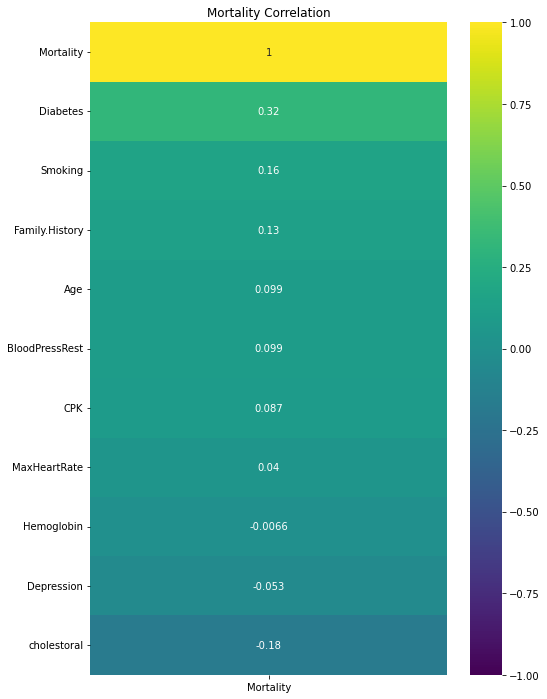

In [43]:
# Graph for the Pearson Correlation between "Mortality" and the others variables

plt.figure(figsize=(8,12))

corr_mortality = df_numeric.corr()[['Mortality']].sort_values(by="Mortality", ascending=False)

heatmap = sns.heatmap(corr_mortality, vmax=1,vmin=-1, annot=True, cmap="viridis")

heatmap.set(title="Mortality Correlation")

plt.show()

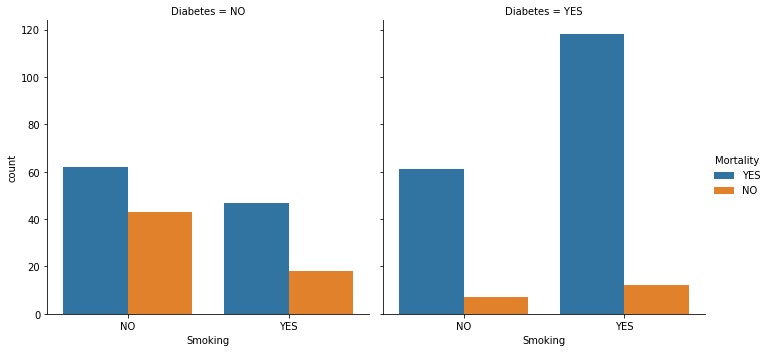

In [49]:
# Graph relating Diabetes, Smoking and Mortality

catplot_m_d_s = sns.catplot(data=df_categorical, x="Smoking", kind="count", hue="Mortality", col="Diabetes")

plt.show()

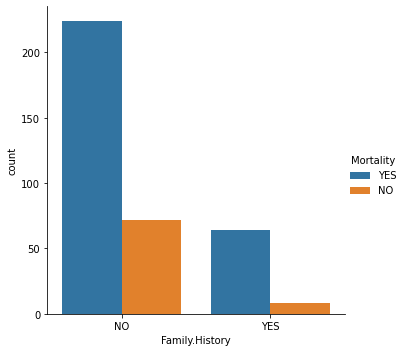

In [51]:
sns.catplot(data=df_categorical, x="Family.History", kind="count", hue="Mortality")

plt.show()